In [11]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

In [2]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('../datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')

In [3]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

Shape of the dataframe: (155, 2)


,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [4]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

In [5]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [6]:
# Function for Sigle exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)

Text(0.5, 1.0, 'Double Smoothing Forecast')

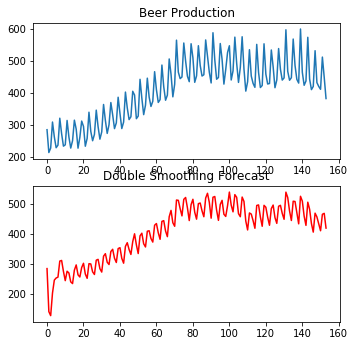

In [7]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

In [8]:
# Single vs Double Forecast value
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)


Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

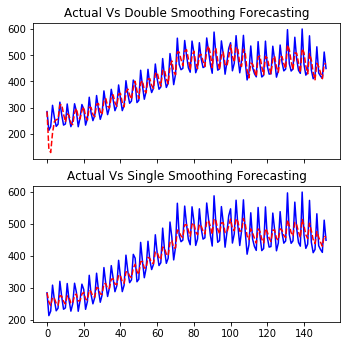

In [9]:
### Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')

Text(0.5, 1.0, 'Double Smoothing Forecast')

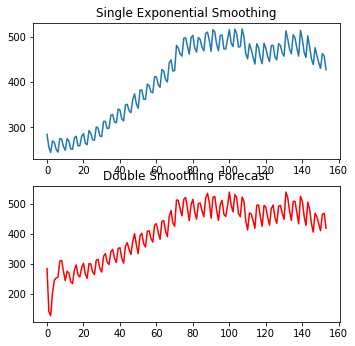

In [10]:
# Plot single and double exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')